In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# MNIST Dataset

In [52]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [53]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

# Smoothing

In [54]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

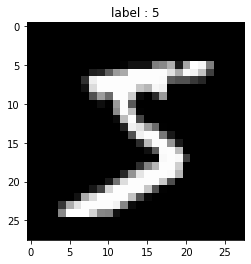

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

<ipython-input-56-73a8eaf8c572>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image = image.astype(np.float) ## Convert to float type


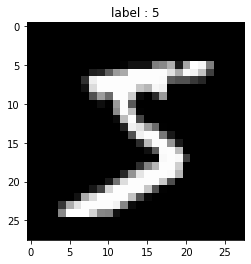

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [56]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) ## Convert to float type
image -= 105.35 ## Intentionally try to create a negative decimal value
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) ## Check the value

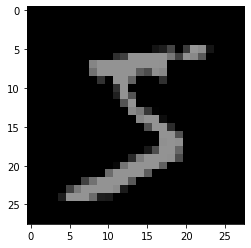

In [57]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

# Preprocessing

In [58]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

<ipython-input-58-c6e824832d96>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = X_train.astype(np.float)
<ipython-input-58-c6e824832d96>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = X_test.astype(np.float)


1.0
0.0


In [59]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [60]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


# Neural Network Scratch

In [61]:
from sklearn.preprocessing import OneHotEncoder
class ScratchSimpleNeuralNetrowkClassifier():
    """
    Simple three-layer neural network classifier

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, n_nodes1, n_nodes2, lr=0.1, epoch=5, batch_size=20, sigma=0.01, activation_func="sigmoid", verbose = True):
        self.verbose = verbose
        self.params = {}
        self.bias = {}
        
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.lr = lr
        self.epoch = epoch
        self.batch_size = batch_size
        self.sigma = sigma
        
        self.train_loss = []
        self.val_loss = []
        
        if activation_func == "sigmoid":
            self.forward_activation_func = self._sigmoid_forward
            self.backward_activation_func = self._sigmoid_backward
        elif activation_func == "tanh":
            self.forward_activation_func = self._tanh_forward
            self.backward_activation_func = self._tanh_backward
        else:
            raise ValueError("No exists such activation function !!")
        
    
    def fit(self, X, y, X_val=None, y_val=None):
        
       ## Whether to record the loss function of verification data
        calc_val = (X_val is not None) & (y_val is not None)
        
        ## One_hot conversion of objective variable
        y = self._one_hot_encoding(y) 
        if calc_val:
            y_val = self._one_hot_encoding(y_val) 
        
        ## Initial value parameter set
        self._set_parameters(X, y)
        
        ## Mini batch object definition
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        
        ## Learning
        for ep in range(self.epoch):
            for mini_X, mini_y in get_mini_batch:
                ## Forward propagation
                ## ① Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A1 = mini_X @ self.params["W1"] + self.bias["b1"]
                Z1 = self.forward_activation_func(A1)
                ## ② Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A2 = Z1 @ self.params["W2"] + self.bias["b2"]
                Z2 = self.forward_activation_func(A2)
                ## ③ Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A3 = Z2 @ self.params["W3"] + self.bias["b3"]
                Z3 = self._softmax(A3)
                #＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

               ## Backpropagation
                ## ③ Layer＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA3 = Z3 - mini_y
                deltaB3 = np.sum(deltaA3, axis=0)
                deltaW3 = Z2.T @ deltaA3

                self.params["W3"] -= self.lr * deltaW3
                self.bias["b3"] -= self.lr * deltaB3
                
                deltaZ2 = deltaA3 @ self.params["W3"].T

                ## ② Layer＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA2 = deltaZ2 * self.backward_activation_func(A2) 
                deltaB2 = np.sum(deltaA2, axis=0)
                deltaW2 = Z1.T @ deltaA2

                self.params["W2"] -= self.lr * deltaW2
                self.bias["b2"] -= self.lr * deltaB2
                
                deltaZ1 = deltaA2 @ self.params["W2"].T
                ## ① Layer＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA1 = deltaZ1 * self.backward_activation_func(A1) 
                deltaB1 = np.sum(deltaA1, axis=0)
                deltaW1 = mini_X.T @ deltaA1

                self.params["W1"] -= self.lr * deltaW1
                self.bias["b1"] -= self.lr * deltaB1
                #＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

            ## Record of loss
            tr_loss = self._cross_entropy(self.predict_prob(X), y)
            self.train_loss.append(tr_loss)
            
            if self.verbose:
                    print("Train loss of epoch {}: {}".format(ep, tr_loss))
            
            if calc_val:
                va_loss = self._cross_entropy(self.predict_prob(X_val), y_val)
                self.val_loss.append(va_loss)
                
                
    def predict_prob(self, X):
        ## Forward propagation
        ## ① Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A1 = X @ self.params["W1"] + self.bias["b1"]
        Z1 = self.forward_activation_func(A1)
        ## ② Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A2 = Z1 @ self.params["W2"] + self.bias["b2"]
        Z2 = self.forward_activation_func(A2)
        ## ③ Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A3 = Z2 @ self.params["W3"] + self.bias["b3"]
        y = self._softmax(A3)
        ##＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        
        return y
                
    def predict(self, X):
        y = np.argmax(self.predict_prob(X), axis=1)
        
        return y
    
    def _set_parameters(self, X, y):
        ## Set the number of features and the number of classes
        self.n_features = X.shape[1] 
        self.n_output = y.shape[1]
        
        ## Initial weight
        self.params["W1"] = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.params["W2"] = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.params["W3"] = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        
       ## Bias initial value
        self.bias["b1"] = self.sigma * np.random.randn(self.n_nodes1, )
        self.bias["b2"] = self.sigma * np.random.randn(self.n_nodes2, )
        self.bias["b3"] = self.sigma * np.random.randn(self.n_output, )
    
    def _sigmoid_forward(self, X):
        return 1 / (1 + np.exp(-X))
    
    def _tanh_forward(self, X):
        return np.tanh(X)
    
    def _sigmoid_backward(self, X):
        return (1-self._sigmoid_forward(X)) * self._sigmoid_forward(X)
    
    def _tanh_backward(self, X):
        return (1 - self._tanh_forward(X)**2)
    
    def _softmax(self, X):
        X = X - np.max(X)
        return np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)
    
    def _one_hot_encoding(self, y):
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        y_one_hot = enc.fit_transform(y[:, np.newaxis])
        return y_one_hot

    def _cross_entropy(self, X, y):
        batch_size = len(X)
        delta = 1e-7
        return -np.sum(y * np.log(X+delta)) / batch_size

In [63]:
class GetMiniBatch:
    """
    Iterator to get a mini-batch

    Parameters
    ----------
    X :The following form ndarray, shape (n_samples, n_features)
      Training data
    y : The following form ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random number seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


# Problem 6 
## Learning and estimation

In [64]:
nn = ScratchSimpleNeuralNetrowkClassifier(400,200, epoch=50,lr=1e-3)
nn.fit(X_train, y_train, X_test, y_test)

<ipython-input-63-1d8616ca4282>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)


Train loss of epoch 0: 2.321446171816317
Train loss of epoch 1: 2.326002838462358
Train loss of epoch 2: 2.3284189646742157
Train loss of epoch 3: 2.2828928048857153
Train loss of epoch 4: 1.6142994230313998
Train loss of epoch 5: 1.176154298636984
Train loss of epoch 6: 0.830203569353142
Train loss of epoch 7: 0.7207670790732811
Train loss of epoch 8: 0.6465830572142462
Train loss of epoch 9: 0.5768271811397495
Train loss of epoch 10: 0.5219023563277866
Train loss of epoch 11: 0.48055894263678517
Train loss of epoch 12: 0.44439099652654634
Train loss of epoch 13: 0.40983846537324553
Train loss of epoch 14: 0.3802368525729105
Train loss of epoch 15: 0.35769869631424284
Train loss of epoch 16: 0.3401477039326962
Train loss of epoch 17: 0.32571693117763306
Train loss of epoch 18: 0.31337970296782697
Train loss of epoch 19: 0.30248424403910545
Train loss of epoch 20: 0.29256321325527795
Train loss of epoch 21: 0.28328029594604726
Train loss of epoch 22: 0.2744068423647841
Train loss of ep

In [65]:
y_pred = nn.predict(X_test)
print("pred:", y_pred)
print("ans:", y_test)
print("accuracy score:", accuracy_score(y_test, y_pred))

pred: [7 2 1 ... 4 5 6]
ans: [7 2 1 ... 4 5 6]
accuracy score: 0.9576


# Problem 7
## Plot of learning curve

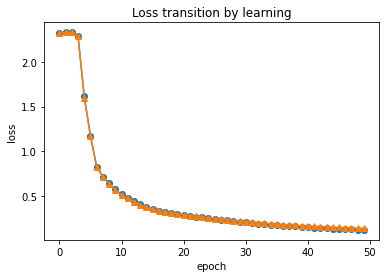

In [66]:
plt.plot(nn.train_loss, marker="o", label="train_loss")
plt.plot(nn.val_loss, marker="^", label="val_loss")
plt.title("Loss transition by learning")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [67]:
nn.train_loss

[2.321446171816317,
 2.326002838462358,
 2.3284189646742157,
 2.2828928048857153,
 1.6142994230313998,
 1.176154298636984,
 0.830203569353142,
 0.7207670790732811,
 0.6465830572142462,
 0.5768271811397495,
 0.5219023563277866,
 0.48055894263678517,
 0.44439099652654634,
 0.40983846537324553,
 0.3802368525729105,
 0.35769869631424284,
 0.3401477039326962,
 0.32571693117763306,
 0.31337970296782697,
 0.30248424403910545,
 0.29256321325527795,
 0.28328029594604726,
 0.2744068423647841,
 0.26580092568797203,
 0.25738652255830186,
 0.2491350067797522,
 0.24105000957510764,
 0.23315524189654077,
 0.22548451357971183,
 0.21807361150977758,
 0.21095413634263271,
 0.204149473014172,
 0.1976728961469132,
 0.19152755662819948,
 0.18570785040659168,
 0.1802015382774286,
 0.17499202637226519,
 0.17006038747943802,
 0.1653869117395987,
 0.1609521497805611,
 0.15673752101709804,
 0.15272560601256457,
 0.14890024215000838,
 0.14524651807588188,
 0.1417507316004551,
 0.13840034729138842,
 0.13518396768

In [68]:
nn.val_loss

[2.322106482664761,
 2.326557410466436,
 2.328759610574702,
 2.2814456541988974,
 1.6008229379853274,
 1.1723928482435295,
 0.824137852532457,
 0.7141015653095067,
 0.6402338707293953,
 0.5708570682915161,
 0.5168091403767108,
 0.4766299172705342,
 0.4414480721093166,
 0.40765524933072433,
 0.37880062033556355,
 0.35706134480474355,
 0.3403115625689519,
 0.3265600307900593,
 0.31474421439204237,
 0.3042603706807827,
 0.29470644909204957,
 0.28579161375487727,
 0.2773073364121438,
 0.2691143930894932,
 0.26113162085670016,
 0.253324275101281,
 0.2456923479461089,
 0.23825911400996547,
 0.2310602132064471,
 0.22413395621925733,
 0.21751375734807307,
 0.2112233720063078,
 0.20527503687559812,
 0.19966997945119336,
 0.19440038570477883,
 0.18945192173944975,
 0.18480616877138595,
 0.18044263361300325,
 0.17634022411886302,
 0.17247821875455935,
 0.16883683193203733,
 0.1653975010811563,
 0.16214301238825127,
 0.15905755315957107,
 0.15612674144866862,
 0.15333764752307436,
 0.1506787962032

# Problem 8 (Advance task)
## Confirmation of misclassification

<ipython-input-69-f0f81ca33d3e>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  false_list = np.where(true_false==False)[0].astype(np.int)


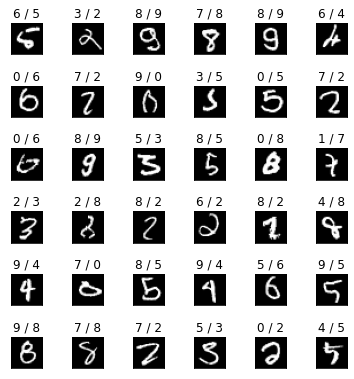

In [69]:
y_val = y_test

"""
Display word classification results side by side. The display above the image is "estimated result / correct answer".

Parameters:
----------
y_pred : Estimated value ndarray (n_samples,)
y_val : Correct label for validation data (n_samples,)
X_val : Features of verification data（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # How many to display
true_false = y_pred==y_test
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_test[false_list[i]]))
    ax.imshow(X_test.reshape(-1,28,28)[false_list[i]], cmap='gray')


# Test

In [70]:
def sigmoid_forwarrd(X):
    return 1 / (1 + np.exp(-X))

def tanh_forwarrd(X):
    return np.tanh(X)

def sigmoid_backward(X):
    return (1- sigmoid_forwarrd(X)) * sigmoid_forwarrd(X)

def tanh_backward(X):
    return (1 - tanh_forwarrd(X)**2)

def softmax(X):
    return np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)

def cross_entropy(X, y):
    batch_size = len(X)
    delta = 1e-7
    return -np.sum(y * np.log(X+delta)) / batch_size

In [71]:
XX = np.array([[1,2],[3,4],[5,6],[7,8]])
yy = np.array([0,1,2,3])

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
yy_one_hot = enc.fit_transform(yy[:, np.newaxis])
    
n_nodes1 = 3
n_nodes2 = 2
n_output = yy_one_hot.shape[1]
n_features = XX.shape[1]

bias1 = np.array([-20, -10, -12])
bias2 = np.array([10, 15])
bias3 = np.array([10, 15, -10, -5])

w1 = np.array([[5, 3, 1], [4, 2, 0]])
w2 = np.array([[-4, 3], [-6, 1], [-8, 5]])
w3 = np.array([[-4, 3, -3, 5], [-6, 1, -2, 2]])

A1 = XX @ w1 + bias1
Z1 = sigmoid_forwarrd(A1)

A2 = Z1 @ w2 + bias2
Z2 = sigmoid_forwarrd(A2)

A3 = Z2 @ w3 + bias3
Z3 = softmax(A3)

Z2.T @ (Z3 - yy_one_hot)

w3 - 0.1 *(Z2.T @ (Z3 - yy_one_hot))

array([[-3.90000609,  2.80152655, -2.9501822 ,  5.04866174],
       [-5.90000009,  0.7000001 , -1.9       ,  2.09999999]])

In [73]:
## 1st layer
deltaA3 = Z3 - yy_one_hot
deltaB3 = np.sum(deltaA3, axis=0)
deltaW3 = Z2.T @ deltaA3
deltaZ2 = deltaA3 @ w3.T

## 2nd layer
deltaA2 = deltaZ2 * sigmoid_backward(A2) 
deltaB2 = np.sum(deltaA2, axis=0)
deltaW2 = Z1.T @ deltaA2
deltaZ1 = deltaA2 @ w2.T

## 3rd layer
deltaA1 = deltaZ1 * sigmoid_backward(A1) 
deltaB1 = np.sum(deltaA1, axis=0)
deltaW1 = XX.T @ deltaA1

In [75]:
print("1st layer")
print(deltaA3.shape)
print(deltaB3.shape)
print(deltaW3.shape)
print(deltaZ2.shape)
print(w3 - 0.1 * deltaW3)
print()
print("Second layer")
print(deltaA2.shape)
print(deltaB2.shape)
print(deltaW2.shape)
print(deltaZ1.shape)
print()
print("Third layer")
print(deltaA1.shape)
print(deltaB1.shape)
print(deltaW1.shape)


1st layer
(4, 4)
(4,)
(2, 4)
(4, 2)
[[-3.90000609  2.80152655 -2.9501822   5.04866174]
 [-5.90000009  0.7000001  -1.9         2.09999999]]

Second layer
(4, 2)
(2,)
(3, 2)
(4, 3)

Third layer
(4, 3)
(3,)
(2, 3)
